# Spectral Analysis in Digital Signal Processing

Digital Signal Processing (DSP) involves the manipulation and analysis of signals that have been digitized. Signals, whether originating from audio, images, video, or sensor data, are functions of one or more independent variables such as time or space.

## Continuous-Time vs Discrete-Time Signals

A signal $x(t)$ can be a function of continuous variable $t$ (generally time), while $x[n]$ represents its sampled form (generally discrete-time), where $n \in \mathbb{Z}$. Recall that $n$ is a-dimensional, it just sets an order on the sequence of samples. The values of $x[n]$ can be real ($\mathbb{R}$) or complex ($\mathbb{C}$).

### Summary

| Property              | Continuous-Time Signal        | Discrete-Time Signal             |
|-----------------------|-------------------------------|----------------------------------|
| Domain                | Continuous ($ \mathbb{R} $)   | Discrete ($ \mathbb{Z} $)        |
| Representation        | $ x(t) $                      | $ x[n] $ or $ x(nT) $            |
| Example               | $ \cos(2\pi f t) $            | $ \cos(2\pi f nT) $              |
| Acquisition Method    | Analog                        | Sampled from analog              |

In practice, all signals processed by computers or digital electronics are discrete-time and often quantized as well (discrete in amplitude).

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import signal
from scipy.signal import get_window

sns.set_style("whitegrid")

## Graphical Comparison: Continuous vs Discrete Signals

We illustrate the visual difference between continuous-time and discrete-time signals using sinusoids.

### 🔍 Key observations:
- The **continuous-time signal** is smooth and defined at every instant in time.
- The **discrete-time signal** only exists at specific sampled points, typically obtained from the continuous version using a uniform sampling rate.
- When the sampling frequency is high enough (according to the Nyquist criterion), the discrete signal visually resembles the continuous one.

By comparing both signals together, we can gain intuition on how discrete-time signals approximate continuous signals in practice.


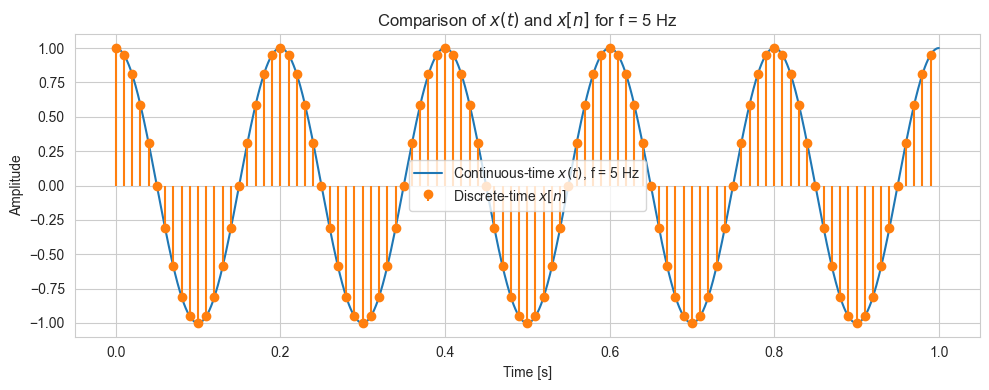

In [2]:
def plot_comparison(frequency, Fs=100):
    A = 1
    phi = 0
    T = 1 / Fs
    t = np.linspace(0, 1, 1000)
    n = np.arange(0, 1, T)

    x_cont = A * np.cos(2 * np.pi * frequency * t + phi)
    x_disc = A * np.cos(2 * np.pi * frequency * n + phi)

    plt.figure(figsize=(10, 4))
    plt.plot(t, x_cont, label=f'Continuous-time $x(t)$, f = {frequency} Hz')
    plt.stem(n, x_disc, basefmt=" ", linefmt='C1-', markerfmt='C1o',
             label='Discrete-time $x[n]$')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title(f'Comparison of $x(t)$ and $x[n]$ for f = {frequency} Hz')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot for 5 Hz (well below Nyquist limit)
plot_comparison(5)

## Aliasing

Aliasing is a phenomenon that occurs when a continuous-time signal is sampled at a rate lower than twice its maximum frequency (violating the **Nyquist criterion**).

### 📐 Nyquist Criterion

Let:
- $ f_s $: sampling frequency [Hz]
- $ f_{max} $: maximum frequency present in the signal

The Nyquist criterion states:

$$
f_s > 2 f_{max}
$$

If this condition is not met, different frequency components "alias" or overlap when sampled, leading to **distorted or misleading frequency representations**.

### 🧠 Intuition:
Imagine watching a spinning wheel in a movie: at certain speeds, it appears to spin backward. That's visual aliasing. In signals, aliasing causes high-frequency components to appear as lower frequencies in the sampled signal.

### 🔁 Aliasing Formula:

A continuous-time sinusoid of frequency $ f $ Hz, when sampled at $ f_s $ Hz, appears in discrete time as a sinusoid with **aliased frequency**:

$$
f_{\text{alias}} = |f - k f_s| \quad \text{where } k = \left\lfloor \frac{f}{f_s} + \frac{1}{2} \right\rfloor
$$

For example, if $ f = 70 $ Hz and $ f_s = 100 $ Hz, then:

$$
f_{\text{alias}} = |70 - 100| = 30 \text{ Hz}
$$


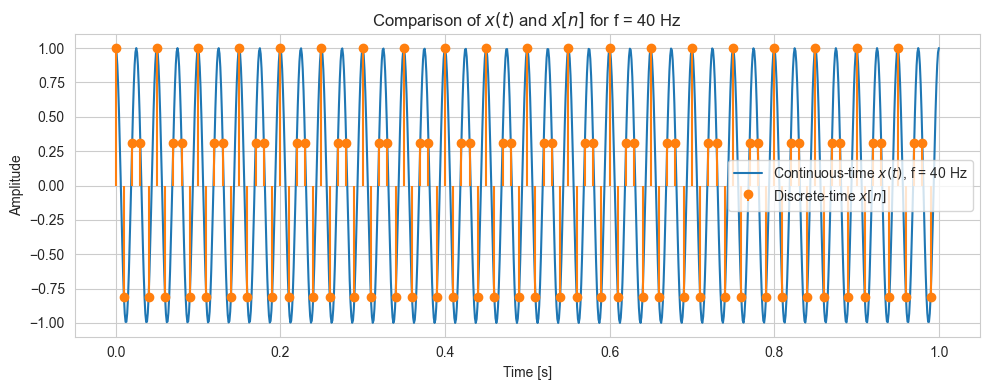

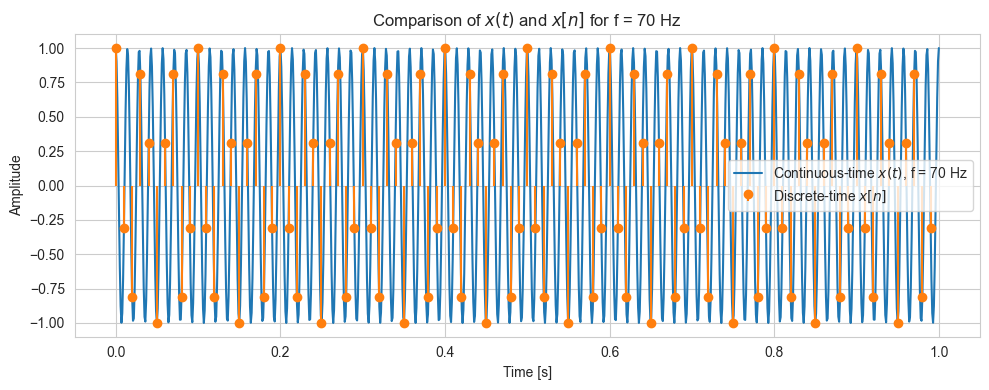

In [3]:
# Below Nyquist (no aliasing)
plot_comparison(40)

# Above Nyquist (aliasing occurs)
plot_comparison(70)


## Signal Reconstruction from Samples

Once a signal is sampled (converted from continuous to discrete), we often want to reconstruct the original continuous signal. Under the **Sampling Theorem** (also called the **Shannon-Nyquist Theorem**), perfect reconstruction is possible **if** the sampling rate is greater than twice the signal’s maximum frequency.

### 🧮 Shannon's Interpolation Formula

The reconstruction uses the **sinc function**:

$$
\text{sinc}(x) = \frac{\sin(\pi x)}{\pi x}
$$

If $ x[n] $ is a bandlimited signal sampled at intervals $ T $, the continuous-time signal $ x(t) $ can be reconstructed as:

$$
x(t) = \sum_{n=-\infty}^{\infty} x[n] \cdot \text{sinc} \left( \frac{t - nT}{T} \right)
$$

This is called **ideal interpolation** using sinc kernels centered at each sample point.

### ⚠️ In practice:
- Real-world systems cannot compute infinite sums.
- Ideal sinc interpolation requires an ideal low-pass filter and is not causal.
- Practical systems use approximations (e.g., windowed sinc, linear interpolation, splines).

Nonetheless, the sinc interpolation is a theoretical gold standard.


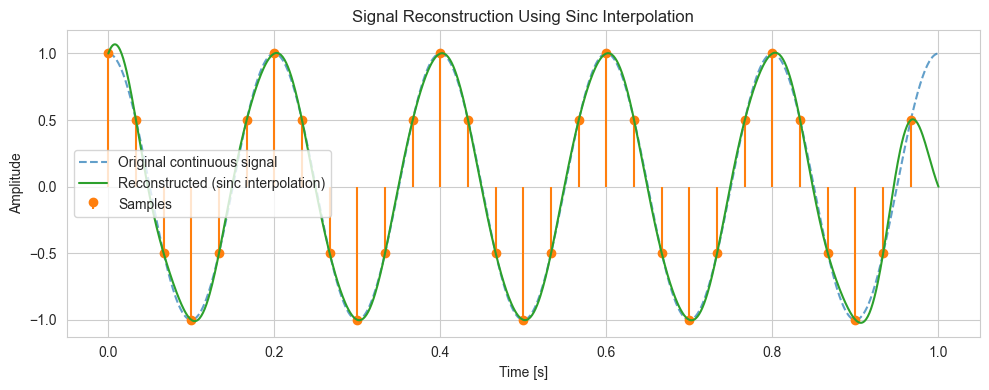

In [4]:
# Parameters
Fs = 30                      # Sampling frequency [Hz]
T = 1 / Fs                   # Sampling period
F = 5                        # Signal frequency [Hz]
t_cont = np.linspace(0, 1, 1000)  # Continuous time vector
n = np.arange(0, 1, T)            # Sampling instants
x_n = np.cos(2 * np.pi * F * n)  # Sampled signal

# Ideal reconstruction using sinc interpolation
def sinc_interp(x_n, n, t, T):
    x_recon = np.zeros_like(t)
    for i in range(len(n)):
        x_recon += x_n[i] * np.sinc((t - n[i]) / T)
    return x_recon

x_rec = sinc_interp(x_n, n, t_cont, T)
x_true = np.cos(2 * np.pi * F * t_cont)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t_cont, x_true, '--', label='Original continuous signal', alpha=0.7)
plt.stem(n, x_n, linefmt='C1-', markerfmt='C1o', basefmt=' ', label='Samples')
plt.plot(t_cont, x_rec, label='Reconstructed (sinc interpolation)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Signal Reconstruction Using Sinc Interpolation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Key Components**

- **Sampling:** The process of converting a continuous-time signal $x(t)$ into a discrete-time signal $x[n]$ by taking samples at intervals $T_s: x[n]=x(nT_s)$.
- **Quantization:** Approximating the amplitude of the sampled signal to a finite set of levels for digital representation.
- **Transformation:** Tools such as the Fourier Transform (FT), Discrete Fourier Transform (DFT), and Z-transform enable the analysis of signals in frequency and z-domains.

## Spectral Analysis

When analyzing real-world signals, we often want to understand their frequency content. This is done using the **Fourier Transform**, usually implemented as a Discrete Fourier Transform (DFT) via the Fast Fourier Transform (FFT).

However, real signals are not infinitely long, so we must window them. This truncation introduces **spectral leakage**, which distorts the frequency content.

In this notebook, we initially used a **rectangular window**, which has a sinc-shaped Fourier transform. This causes significant leakage: energy spreads from the main frequency to nearby frequencies.

To reduce leakage, we can apply smoother windows such as:
- Hann
- Hamming
- Blackman

These windows reduce side lobes at the cost of widening the main lobe (trading leakage for resolution).


## Continuous-Time Sinusoid with Rectangular Window

Consider a continuous-time sinusoid of amplitude $a$, frequency $f_x$, limited in duration by a rectangular window:

$$
x(t) = a \sin(2 \pi f_x t) \cdot \operatorname{rect}\!\left(\frac{t}{\tau} - \frac{1}{2}\right)
$$

where the **rectangular function**, $\operatorname{rect}(u)$, also known as pulse, equals 1 if $|u| < \tfrac{1}{2}$, and 0 otherwise. It truncates the sinusoid to the interval $[0, \tau]$

###  Frequency-Domain Expression

The Fourier transform of this windowed sinusoid is:

$$
X(f) = \frac{a \tau}{2j} \left[
  \operatorname{sinc}\!\big(\tau (f - f_x)\big)
  - \operatorname{sinc}\!\big(\tau (f + f_x)\big)
\right] e^{-j \pi \tau f}
$$

This expression shows two sinc-shaped lobes, centered at $\pm f_x$, scaled by $\tau$ and modulated by a linear phase term $e^{-j\pi\tau f}$.


###  Intuition

- The **rectangular window** limits the signal in time, equivalent to convolution with a sinc function in frequency.
- The **windowed sinusoid** results in two sinc patterns in the frequency domain, at positive and negative frequencies.
- The width of the sinc lobes is inversely proportional to the window duration $\tau$: longer windows give narrower main lobes (better frequency resolution); shorter windows give wider lobes (greater spectral leakage).


Additional material on the **sinc-pulse** duality can be found in the [sinc-pulse](./sinc-pulse.ipynb) notebook.

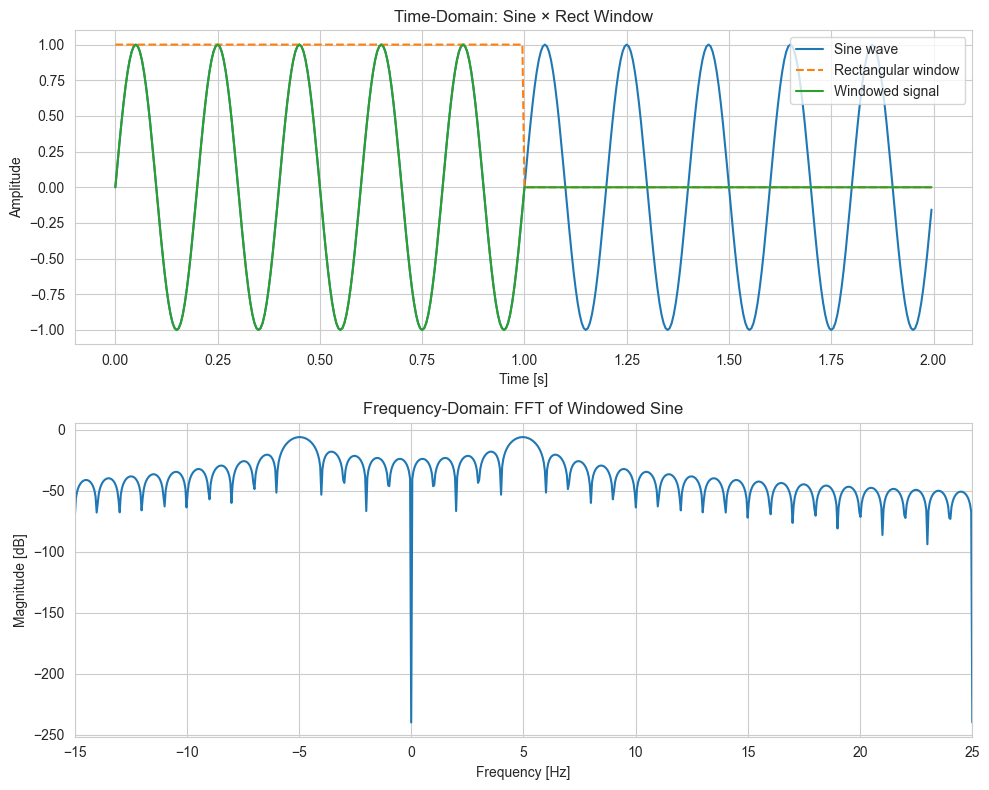

In [5]:
# Parameters
a = 1.0           # Amplitude
f_x = 5          # Frequency of the sine [Hz]
tau = 1          # Duration of window [s]
fs = 200         # Sampling frequency [Hz]
t = np.arange(0, 2, 1/fs)  # Time axis to cover [0,2] s

# Continuous-time sine signal
x_true = a * np.sin(2 * np.pi * f_x * t)

# Rectangular window centered in [0, tau]
rect = np.where((t >= 0) & (t < tau), 1.0, 0.0)

# Windowed signal
x = x_true * rect

# FFT
nfft = 4096
f = np.fft.fftfreq(nfft, d=1/fs)
X = np.fft.fft(x, nfft)
X_mag = np.abs(np.fft.fftshift(X)) * (1/fs)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Time domain
axs[0].plot(t, x_true, label='Sine wave')
axs[0].plot(t, rect, label='Rectangular window', linestyle='--')
axs[0].plot(t, x, label='Windowed signal')
axs[0].set_title('Time-Domain: Sine × Rect Window')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Amplitude')
axs[0].legend()
axs[0].grid(True)

# Frequency domain
axs[1].plot(np.fft.fftshift(f), 20 * np.log10(X_mag + 1e-12))
axs[1].set_title('Frequency-Domain: FFT of Windowed Sine')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel('Magnitude [dB]')
axs[1].set_xlim(f_x - 20, f_x + 20)
axs[1].grid(True)

plt.tight_layout()
plt.show()


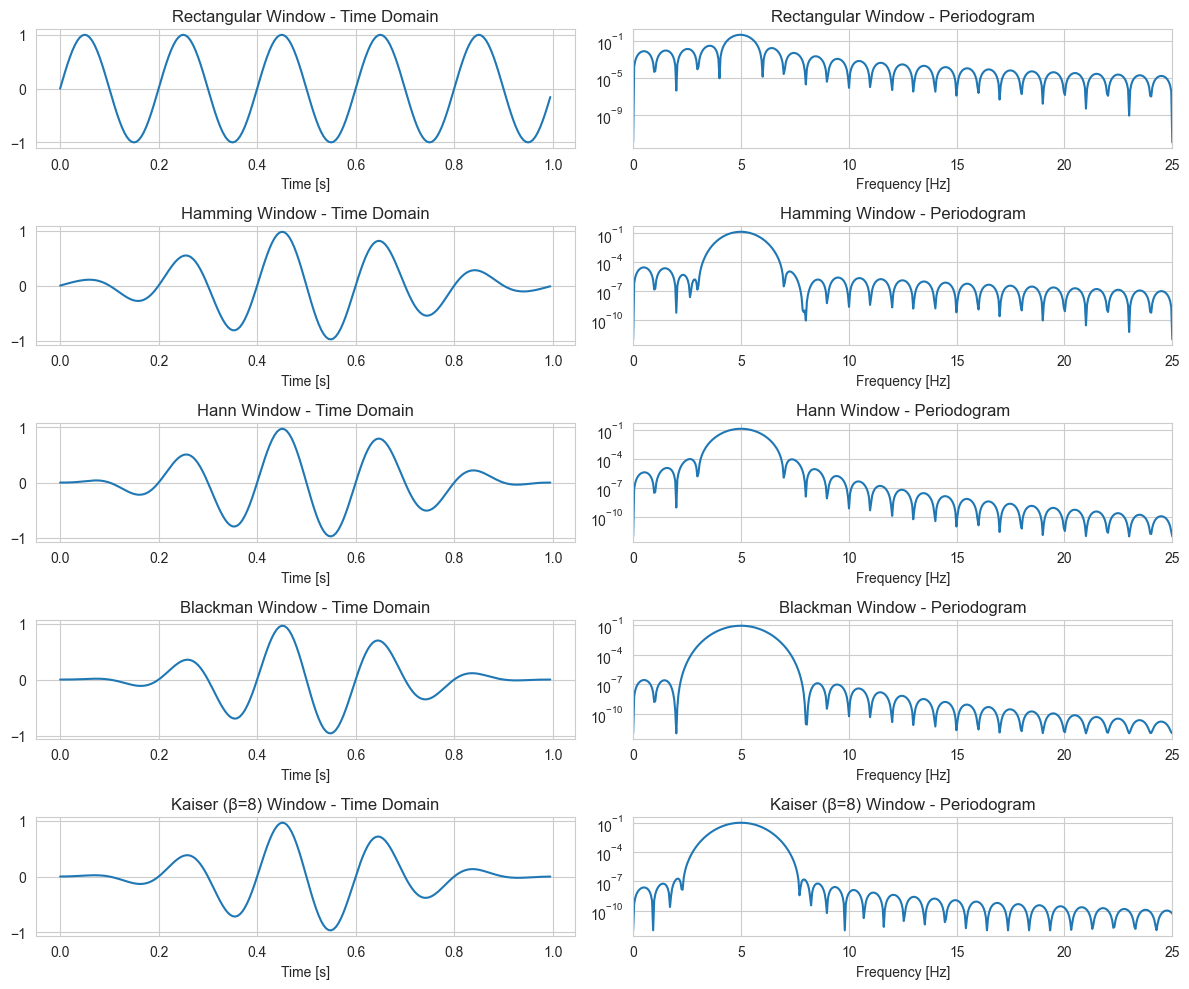

In [10]:
# Continuous-time sine signal
sine = a * np.sin(2 * np.pi * f_x * t)

# Define a windowed sine using Hann, Hamming, and Blackman
windows = {
    "Rectangular": np.ones_like(t[:int(fs*tau)]),
    "Hamming": get_window("hamming", int(fs*tau)),
    "Hann": get_window("hann", int(fs*tau)),
    "Blackman": get_window("blackman", int(fs*tau)),
    "Kaiser (β=8)": get_window(("kaiser", 8), int(fs*tau))
}

fig, axs = plt.subplots(len(windows), 2, figsize=(12, 10))
f_range = (0, f_x + 20)

for i, (win_name, win_vals) in enumerate(windows.items()):
    # Apply window
    sine_cut = sine[:int(fs*tau)]
    x_win = sine_cut * win_vals

    # Periodogram (PSD estimate)
    f_psd, Pxx = signal.periodogram(x_win, fs=fs, window='boxcar', nfft=nfft, scaling='spectrum')

    # Time plot
    axs[i, 0].plot(t[:int(fs*tau)], x_win)
    axs[i, 0].set_title(f'{win_name} Window - Time Domain')
    axs[i, 0].set_xlabel('Time [s]')
    axs[i, 0].grid(True)

    # Frequency plot
    axs[i, 1].semilogy(f_psd, Pxx + 1e-12)
    axs[i, 1].set_xlim(f_range)
    axs[i, 1].set_title(f'{win_name} Window - Periodogram')
    axs[i, 1].set_xlabel('Frequency [Hz]')
    axs[i, 1].grid(True)

plt.tight_layout()
plt.show()


### Interpretation

- **Rectangular window** has the narrowest main lobe but the highest side lobes → large spectral leakage.
- **Hann**, **Hamming**, and **Blackman** windows have reduced leakage due to smoother edges, but broader main lobes.
- The **periodogram** helps estimate the Power Spectral Density (PSD), showing how energy distributes across frequencies.
- There’s a trade-off between **frequency resolution** and **leakage suppression**.

This demonstrates why window selection is crucial for accurate spectral analysis.

Additional material on **signal windowing** can be found in the [analysis_windows](../analysis_windows/windowed-signal.ipynb) notebook.